In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

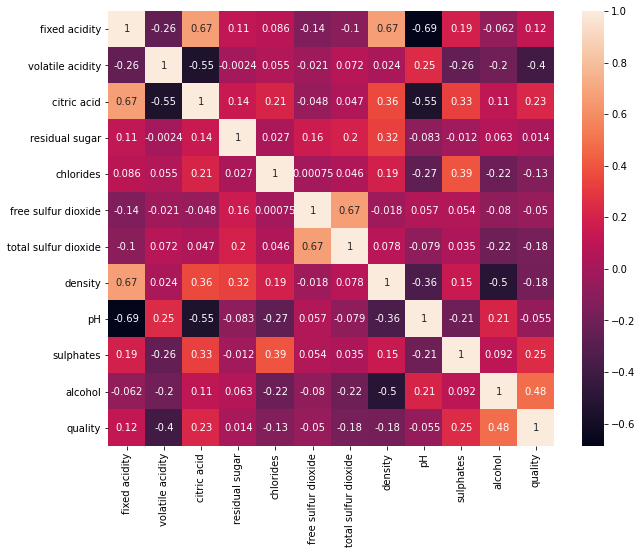

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True)

In [17]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
x = df.iloc[:,:11]
y = df.iloc[:,-1]

In [19]:
x.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 10)

In [22]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1087, 11) (272, 11)
(1087,) (272,)


In [23]:
rtc = DecisionTreeClassifier()

In [24]:
rtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
rtc.score(x_train,y_train)

1.0

In [26]:
y_pred = rtc.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.4963235294117647

# Hyperparameter Tuning

In [39]:
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [40]:
grid = GridSearchCV(estimator =rtc,param_grid = grid)

In [41]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [42]:
y_pred1 = grid.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred1)

0.5588235294117647

In [44]:
grid.best_score_

0.6035513465522344

In [45]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       min_samples_split=7, splitter='random')

In [46]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 9,
 'min_samples_split': 7,
 'splitter': 'random'}

In [47]:
# Randomized Search CV

In [53]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'splitter' :["best", "random"],
    'criterion':['gini', 'entropy'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [54]:
ran = RandomizedSearchCV(estimator = rtc, param_distributions = param_grid)

In [55]:
ran.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 10, None],
                                        'max_features': [0.25, 0.5, 1.0],
                                        'min_samples_split': [0.25, 0.5, 1.0],
                                        'splitter': ['best', 'random']})

In [56]:
y1_pred = ran.predict(x_test)

In [57]:
accuracy_score(y_test,y1_pred)

0.5110294117647058

In [58]:
ran.best_score_

0.563953832494821

In [59]:
ran.best_estimator_

DecisionTreeClassifier(max_features=1.0, min_samples_split=0.5)

In [60]:
ran.best_params_

{'splitter': 'best',
 'min_samples_split': 0.5,
 'max_features': 1.0,
 'max_depth': None,
 'criterion': 'gini'}

# feature_importances_ gives us the idea about columns, which columns are more important for decision Tree (in percent). helps us for dimensionality reduction

In [62]:
for importance, name in sorted(zip(rtc.feature_importances_, x_train.columns),reverse=True):
  print (name, importance)

alcohol 0.16531743646018326
sulphates 0.13011205022485758
volatile acidity 0.11201689727979966
total sulfur dioxide 0.11065248780311289
residual sugar 0.08189986181428849
density 0.07723753132392605
chlorides 0.07661691155708715
citric acid 0.06763331917102698
pH 0.06457499128709117
fixed acidity 0.062440301036826934
free sulfur dioxide 0.05149821204179985


In [63]:
from dtreeviz.trees import *

In [74]:
clas = tree.DecisionTreeClassifier(max_depth=2)

In [75]:
clas.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[10] <= 9.925\ngini = 0.645\nsamples = 1087\nvalue = [8, 36, 458, 436, 134, 15]'),
 Text(0.25, 0.5, 'x[6] <= 94.5\ngini = 0.473\nsamples = 451\nvalue = [3, 16, 304, 120, 7, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.518\nsamples = 370\nvalue = [3, 15, 229, 115, 7, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.139\nsamples = 81\nvalue = [0, 1, 75, 5, 0, 0]'),
 Text(0.75, 0.5, 'x[9] <= 0.635\ngini = 0.653\nsamples = 636\nvalue = [5, 20, 154, 316, 127, 14]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.623\nsamples = 302\nvalue = [5, 17, 105, 150, 24, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.635\nsamples = 334\nvalue = [0, 3, 49, 166, 103, 13]')]

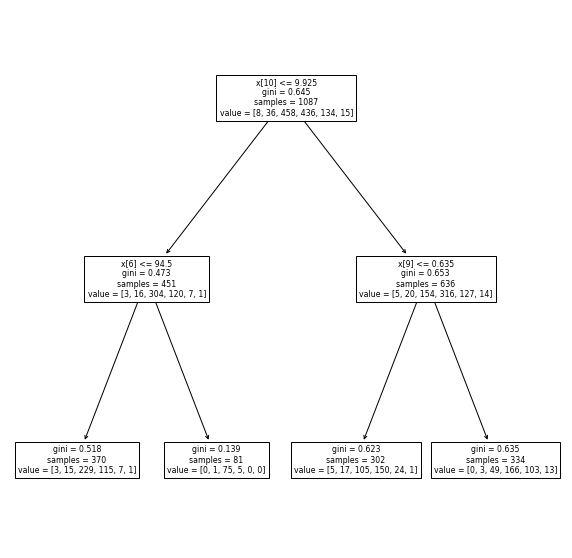

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,10))
plot_tree(clas)